In [75]:
from qiskit import QuantumCircuit

import numpy as np

n = 4
initial_state = '1010'
circuit = QuantumCircuit(n)

# randomly initialize initial state
for q in range(n):
    if initial_state[q] == '1':
        circuit.x(q)

circuit.save_statevector(label='initial_state')

# quantum fourier transform QFT
for q in range(n):
    circuit.h(q)
    for next_q in range(q+1, n):
        circuit.cp( np.pi / (2**(next_q-q)), next_q, q )

# swap to correct order    
for q in range(n//2):
        circuit.swap(q, n-q-1)

circuit.save_statevector(label='final_state')
circuit.draw()

┌───┐ initial_state ┌───┐                                         »
q_0: ┤ X ├───────░───────┤ H ├─■────────■─────────────■────────────────»
     └───┘       ░       └───┘ │P(π/2)  │       ┌───┐ │                »
q_1: ────────────░─────────────■────────┼───────┤ H ├─┼────────■───────»
     ┌───┐       ░                      │P(π/4) └───┘ │        │P(π/2) »
q_2: ┤ X ├───────░──────────────────────■─────────────┼────────■───────»
     └───┘       ░                                    │P(π/8)          »
q_3: ────────────░────────────────────────────────────■────────────────»
                 ░                                                     »
«                                     final_state 
«q_0: ─────────────────────────────X───────░──────
«                                  │       ░      
«q_1: ─■───────────────────────X───┼───────░──────
«      │       ┌───┐           │   │       ░      
«q_2: ─┼───────┤ H ├─■─────────X───┼───────░──────
«      │P(π/4) └───┘ │P(π/2) ┌───┐ │       ░      
«q_3: ─■─────────────■───────┤ H ├─X───────░──────
«                            └───┘         ░

In [76]:
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_bloch_multivector

simulator = AerSimulator()
result = simulator.run(circuit).result()

initial_statevector = result.data(0)['initial_state']
final_statevector = result.data(0)['final_state']

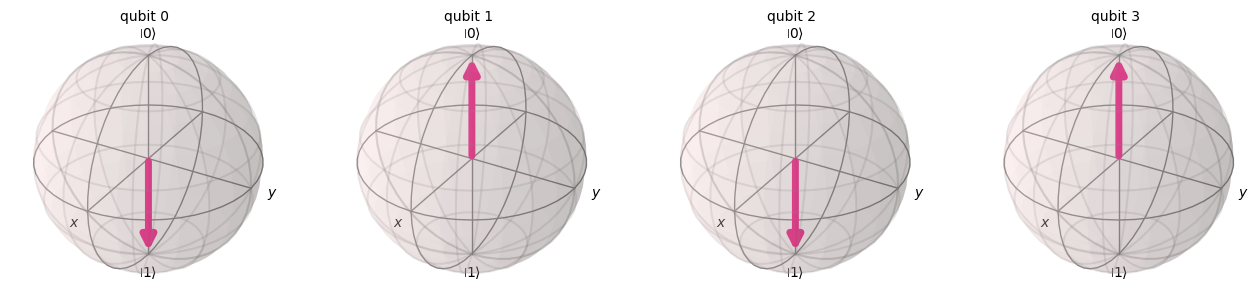

In [77]:
plot_bloch_multivector(initial_statevector)

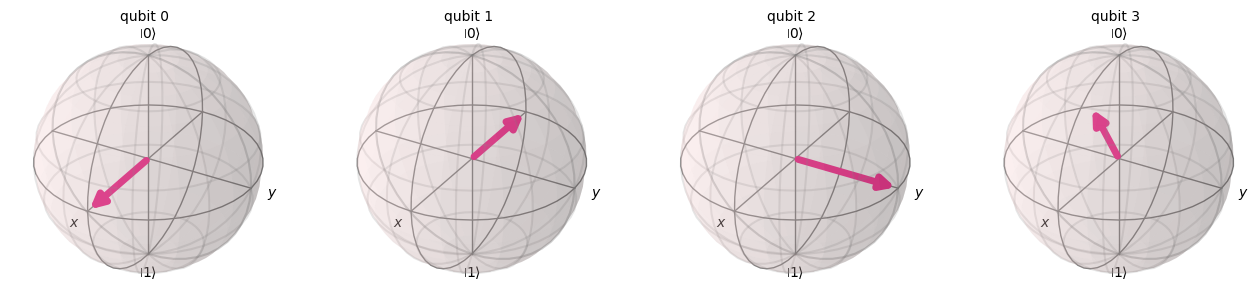

In [78]:
plot_bloch_multivector(final_statevector)